Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

In [34]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/diabetes_.csv")

print("First 5 rows:")
display(data.head())

print("\nDataset info:")
data.info()

print("\nMissing values per column:")
print(data.isnull().sum())

print("\nSummary statistics:")
display(data.describe())

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:

In [35]:
# Replace zero values with NaN where zero is not realistic
cols_with_zero_issue = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zero_issue:
    data[col] = data[col].replace(0, data[col].median())

print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Feature Engineering:

In [36]:
import numpy as np

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * test_size)
    test_idx = indices[:split]
    train_idx = indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (538, 8)
Test shape: (230, 8)


4. Implement KNN:

In [37]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


In [38]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    nearest_labels = [label for _, label in distances[:k]]

    prediction = max(set(nearest_labels), key=nearest_labels.count)
    return prediction


In [39]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []
    for x in X_test:
        predictions.append(knn_predict_single(x, X_train, y_train, k))
    return np.array(predictions)


In [40]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


In [41]:
predictions = knn_predict(X_test, X_train, y_train, k=5)
accuracy_unscaled = compute_accuracy(y_test, predictions)

print(f"Accuracy (Unscaled Data): {accuracy_unscaled:.2f}%")


Accuracy (Unscaled Data): 67.39%


Problem - 2 - Experimentation:

1. Repeat the Classification Task:


In [42]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = min_max_scale(X)

Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)


2. Comparative Analysis: Compare the Results -


In [43]:
pred_scaled = knn_predict(Xs_test, Xs_train, ys_train, k=5)
accuracy_scaled = compute_accuracy(ys_test, pred_scaled)

print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}%")


Accuracy (Scaled Data): 73.48%


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

In [44]:
import time

k_values = range(1, 16)
acc_unscaled = []
acc_scaled = []
time_unscaled = []
time_scaled = []

for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_unscaled.append(time.time() - start)
    acc_unscaled.append(compute_accuracy(y_test, pred))

    start = time.time()
    pred = knn_predict(Xs_test, Xs_train, ys_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(ys_test, pred))


2. Visualize the Results:

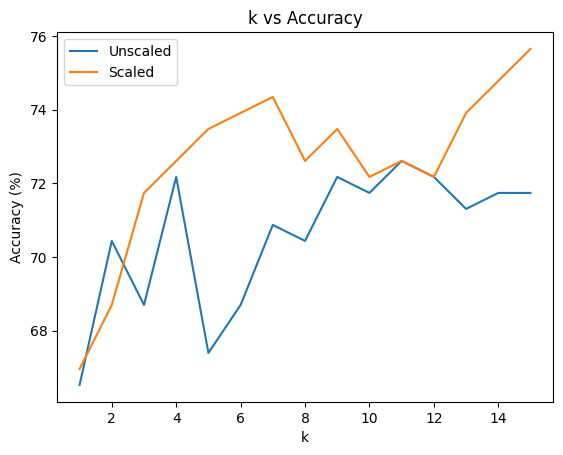

In [45]:
import matplotlib.pyplot as plt

plt.plot(k_values, acc_unscaled, label="Unscaled")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.show()


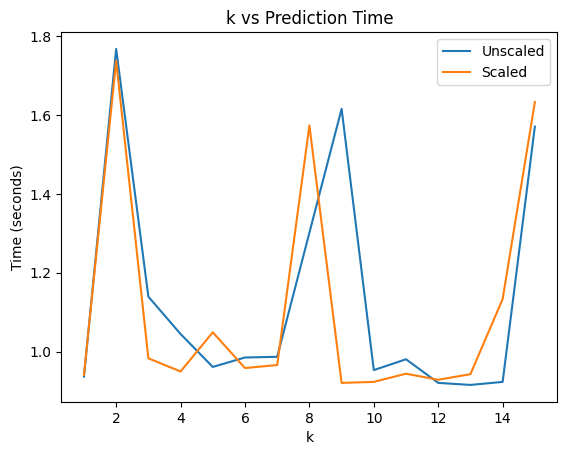

In [46]:
plt.plot(k_values, time_unscaled, label="Unscaled")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Prediction Time")
plt.legend()
plt.show()
